In [1]:
import numpy as np
from matplotlib import pyplot as plt

---
Construct octagon vertex using rotation matrix

In [2]:
def make_octagon():
    C = np.zeros((8,2)) #holds cartesian coordinates
    S = np.array([1,0]) #starting vals at 0 radians (the east cardinal notch)
    for i in range(8):
        theta = i*(np.pi/4) #angels for 8 octants
        c = np.cos(theta)
        s = np.sin(theta)
        R = np.array([[c,-s],
                      [s,c]])   # rotation matrix
        C[i] = R@S  #matrix multiply
    return C


def show_input_space(C):
    A = np.copy(C)
    A = np.vstack([C, C[0,:]]) #add first row to end so plot fill all line segments
    fig = plt.figure()
    ax = fig.add_subplot()
    plt.plot(A[:,0],A[:,1], color="red", marker="o")

    for i in range(8):  #plot 
        pts = np.array([[0,0],
                        A[i,:]])
        plt.plot(pts[:,0],pts[:,1], color="grey")
        
    axes=plt.gca()
    axes.set_aspect(1)
    plt.show()

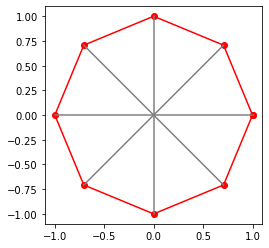

In [3]:
C = make_octagon()

show_input_space(C)


We will apply a seperate linear transform to each of the triangels in the input space. Each of the verticies (red dots) will have to line up in order for the vals on the boundries of each transfrom to match up (smooth transition bewteen each octant i.e. no jumping/skipping in values)

Each transform will be given in the standard AX=B form. In our case we will have TX = X' where T is our transform matrix, X are our input coordinates (the notch verticies as x,y coordinates), and X' are our adjusted values.

We will take input values and transform them into a near perfect octagon like in the graph above.

Think of the input space as one of those stat charts from an OP character in jojo. Its close to an octagon but not quite perfect. Just like in jojo we want good stats so were gonna max out everything. For the case of this example I'm going to move one of the vertex values a bit (more than it prob would be in reality) so we can see it in action.
 

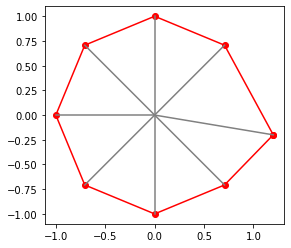

In [4]:
C_shifted = np.copy(C)
C_shifted[0,0] = 1+0.2
C_shifted[0,1] = 0-0.2
show_input_space(C_shifted)

In [5]:
X = C_shifted[:2,:]
print(X)   #first 2 notches
Xp = C[:2,:]
print(Xp)

[[ 1.2        -0.2       ]
 [ 0.70710678  0.70710678]]
[[1.         0.        ]
 [0.70710678 0.70710678]]


Since the equation is given by TX=X' we solve for the transform T=X'Xinv
where Xinv is the inverse of X

In [6]:
T = Xp@np.linalg.inv(X)
T

array([[ 7.14285714e-01,  2.02030509e-01],
       [-1.04179245e-17,  1.00000000e+00]])

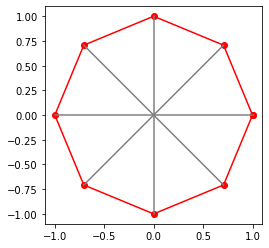

In [7]:
C_shifted[:2,:] = T@X #replacing the shifted values with the ones we calculated through the transform.
show_input_space(C_shifted)

Magic! its back to being nearly perfect. Now this can be applied to all 8 points in each of the 8 notches to make the inputs perfectly line up with their physical location. This is also how, if you have custom notching on you controller, you will be able to map those as well. 

For custom notches, there will be 2 new divisins of the space on either side of each standard notch. Those input positoins can be mapped through the same process as I worked through above.

As you can see the [0,1] val is not exactly 0 but don't worry it is as close as we can get with 64 bit floating point numbers. Since im running this on a 64 bit conputer (m1 mac air) the 64 bit floating point operations can only have a maximum precision of about 10E-16. This is called the [machine precision](https://en.wikipedia.org/wiki/Machine_epsilon). The microcontroller that this will run on for the actual Mag Pot will be a 32 bit microcontroller so about 10E-7 machine precision is expected which is still so little that it does not matter for our use case. It is true that there could possibly be cases where the linear system is unstable but in out case the regions are set up where very little magnification will ocur in the transform.

[Twitter for updates](https://twitter.com/bread_mods)